In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,15]
import seaborn as sns
sns.set(palette='bright')

In [2]:
cases = pd.read_csv('CasesCAMCAR.csv', index_col=0)
deaths = pd.read_csv('DeathsCAMCAR.csv', index_col=0)
recovered = pd.read_csv('InternationalRecovered.csv', index_col=0)

In [3]:
cases

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/9/20,6485,42216,26658,2846,8844,26384,40790,753,133,2403
7/10/20,6845,43257,27619,2846,9142,27053,41915,753,133,2413
7/11/20,7231,44332,28598,2846,9391,27583,43114,758,133,2420
7/12/20,7596,45633,29355,2846,9674,28090,44532,758,133,2426


In [4]:
deaths.head()

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0


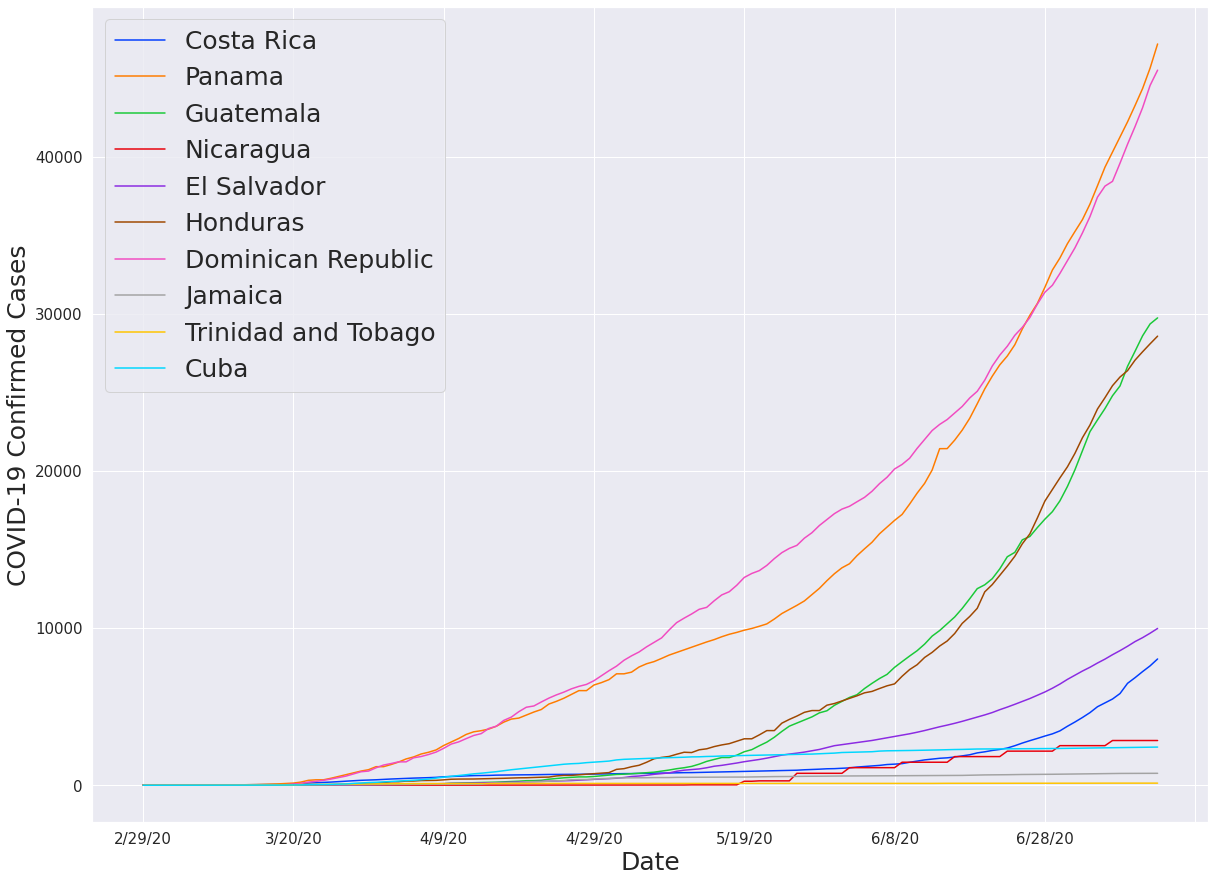

In [5]:
cases.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Confirmed Cases', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

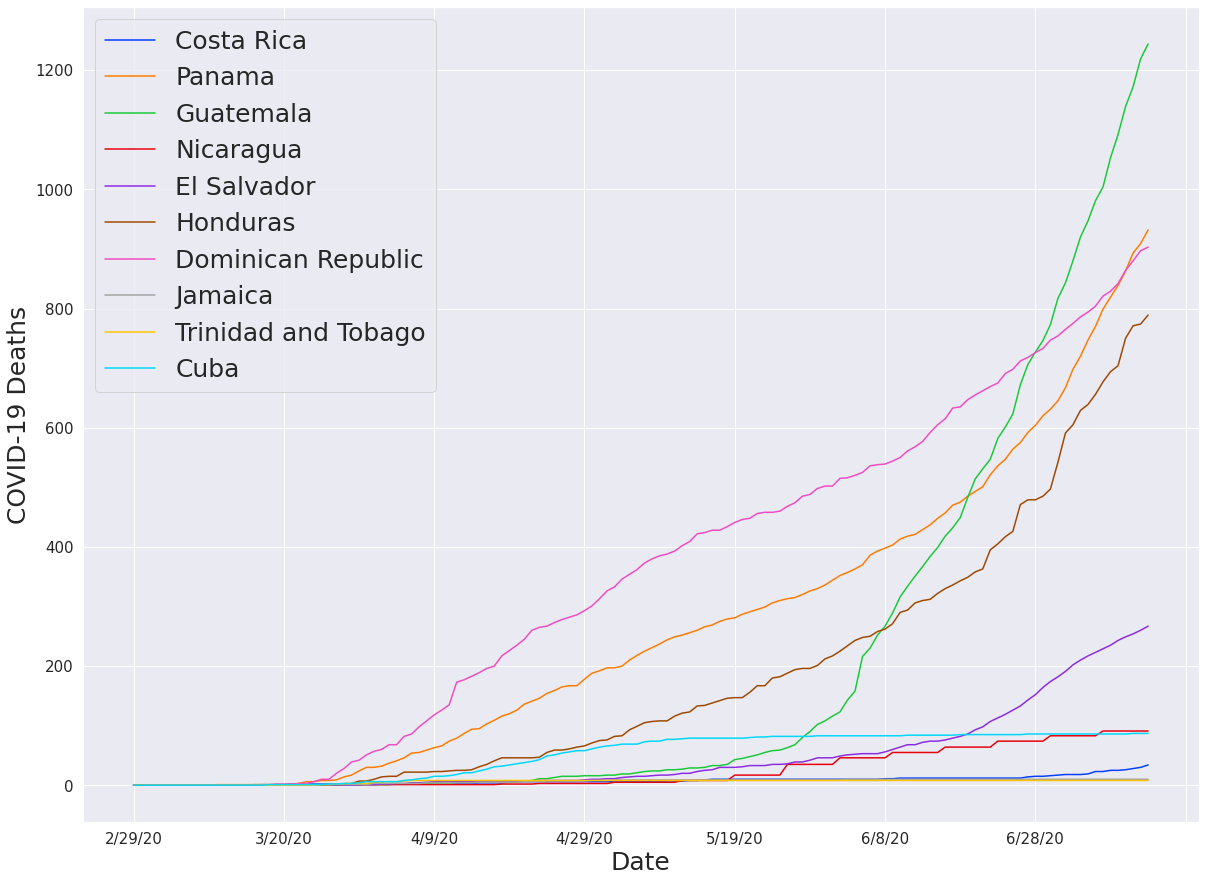

In [6]:
deaths.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Deaths', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [7]:
new_cases_per_day = cases.diff().dropna()
new_cases_per_day

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
3/1/20,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3/2/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3/3/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3/4/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3/5/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7/9/20,649.0,965.0,1247.0,0.0,278.0,406.0,1202.0,2.0,0.0,4.0
7/10/20,360.0,1041.0,961.0,0.0,298.0,669.0,1125.0,0.0,0.0,10.0
7/11/20,386.0,1075.0,979.0,0.0,249.0,530.0,1199.0,5.0,0.0,7.0
7/12/20,365.0,1301.0,757.0,0.0,283.0,507.0,1418.0,0.0,0.0,6.0


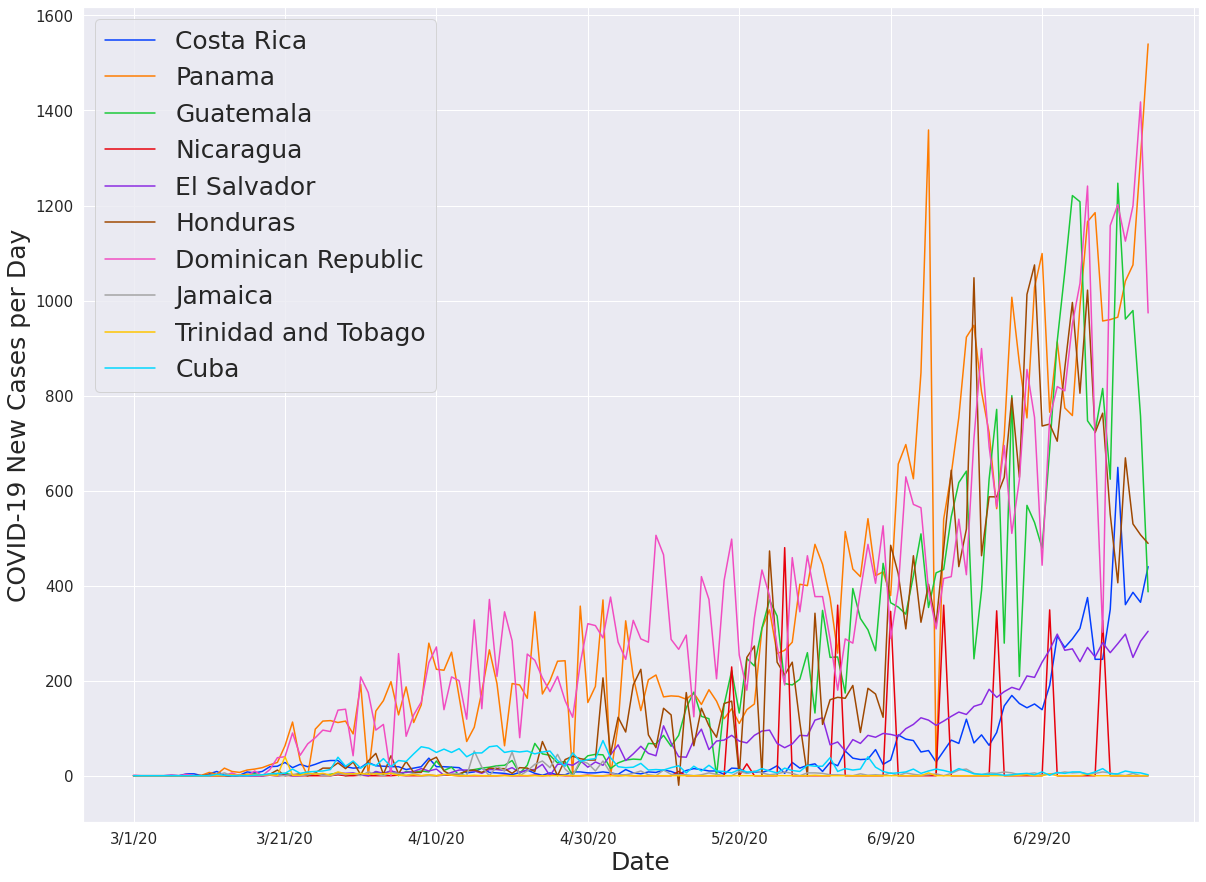

In [8]:
new_cases_per_day.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 New Cases per Day', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [9]:
def prep_for_pie_chart(data, quantile=0.0):
    latest = data.iloc[-1,:]
    latest = latest[latest != 0]
    if quantile != 0:
        quant = latest.quantile(quantile)
        smallest_countries = latest[latest <= quant]
        temp = pd.Series(smallest_countries.sum())
        temp.index = ['Others']
        totals = latest[latest > quant]
        name = totals.name
        totals = totals.append(temp)
        totals.rename(name)
    else:
        totals = latest
    return totals

In [10]:
def draw_pie_chart(data, title):
    name = data.name
    data.plot(kind='pie', autopct='%.2f%%', labels=['']*len(data), startangle=0)
    plt.ylabel(name, fontsize=15)
    plt.legend(fontsize=12, labels=data.index)
    plt.title(title, fontsize=25)

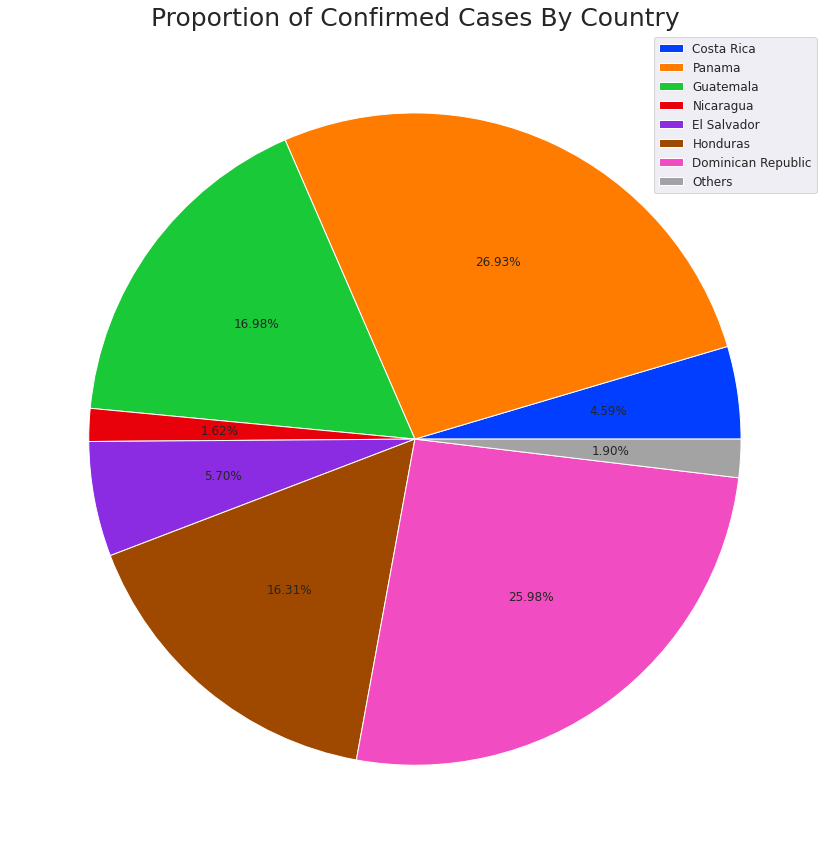

In [11]:

draw_pie_chart(prep_for_pie_chart(cases, 0.24), 'Proportion of Confirmed Cases By Country')
plt.show()

In [12]:
deaths_totals = prep_for_pie_chart(deaths)

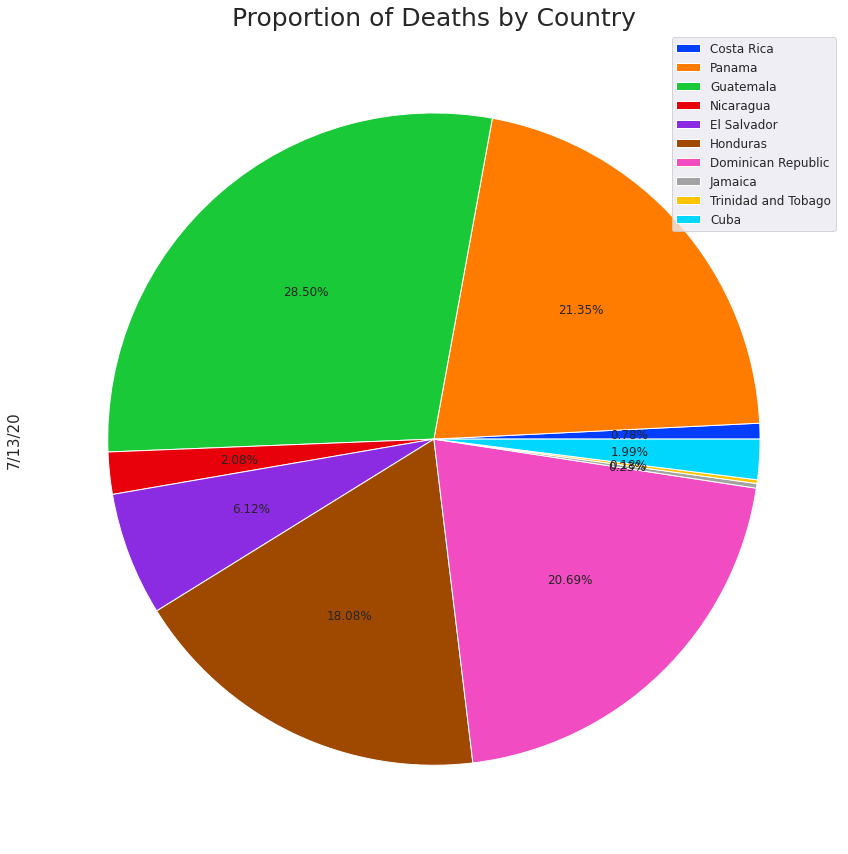

In [13]:
draw_pie_chart(deaths_totals, 'Proportion of Deaths by Country')

In [14]:
growth_df = pd.read_csv('GrowthFactorCAMCAR.csv', index_col=0)
growth_df

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3/1/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3/2/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
3/3/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
3/4/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
7/9/20,1.111206,1.023393,1.049073,1.0,1.032454,1.015629,1.030363,1.002663,1.0,1.001667
7/10/20,1.055513,1.024659,1.036049,1.0,1.033695,1.025356,1.027580,1.000000,1.0,1.004161
7/11/20,1.056392,1.024851,1.035447,1.0,1.027237,1.019591,1.028606,1.006640,1.0,1.002901
7/12/20,1.050477,1.029347,1.026470,1.0,1.030135,1.018381,1.032890,1.000000,1.0,1.002479


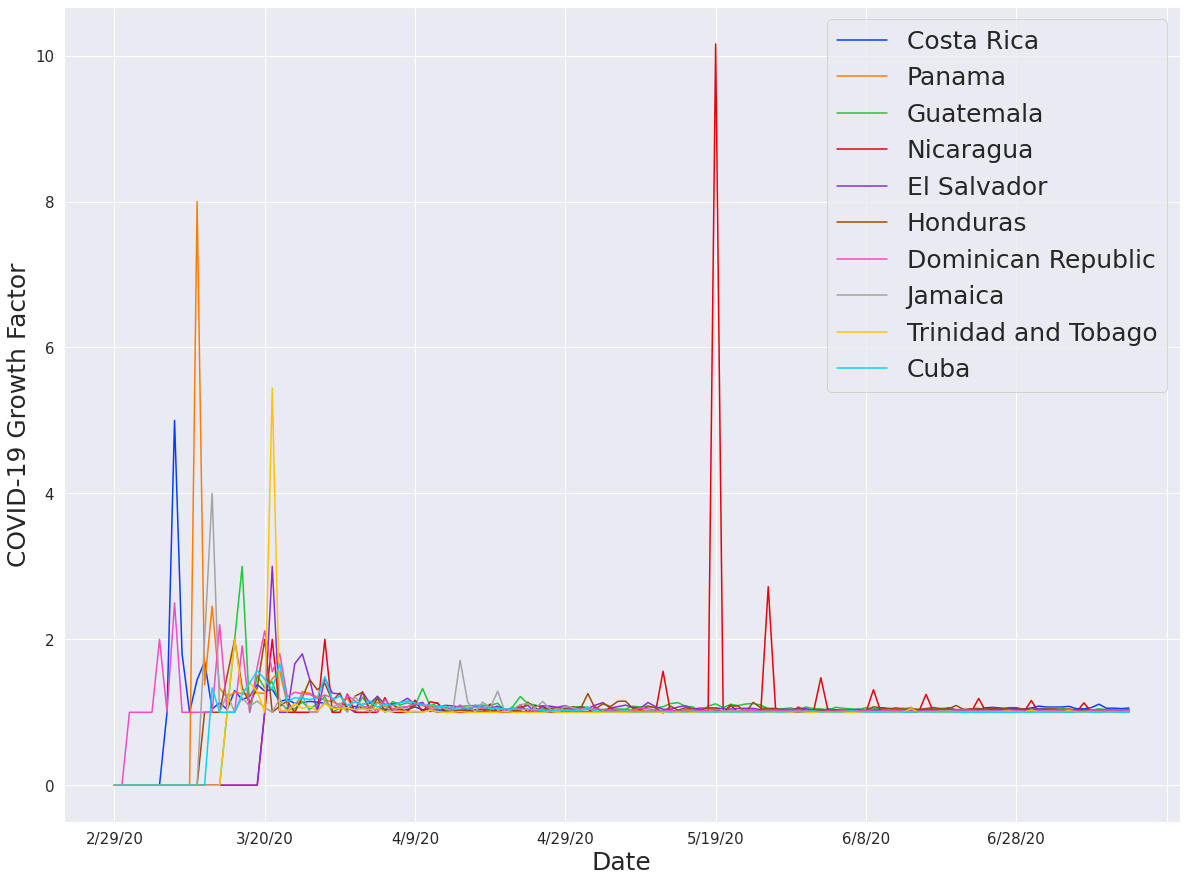

In [15]:
growth_df.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [16]:
growth_df.describe()

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,1.038208,1.043600,0.978605,0.974522,0.933373,0.991702,1.083931,0.977851,0.944179,0.959775
std,0.429800,0.685949,0.397125,0.901773,0.435099,0.340298,0.269426,0.412982,0.514214,0.332108
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.010821,1.021134,1.031001,1.000000,1.027923,1.019176,1.018241,1.000000,1.000000,1.002661
50%,1.030417,1.030628,1.052114,1.000000,1.037104,1.040786,1.028666,1.006977,1.000000,1.006915
75%,1.056955,1.057077,1.087451,1.000000,1.069165,1.067935,1.049877,1.033810,1.002033,1.051455
max,5.000000,8.000000,3.000000,10.160000,3.000000,2.000000,2.500000,4.000000,5.444444,1.666667


In [17]:
growth_df.mean()

Costa Rica             1.038208
Panama                 1.043600
Guatemala              0.978605
Nicaragua              0.974522
El Salvador            0.933373
Honduras               0.991702
Dominican Republic     1.083931
Jamaica                0.977851
Trinidad and Tobago    0.944179
Cuba                   0.959775
dtype: float64

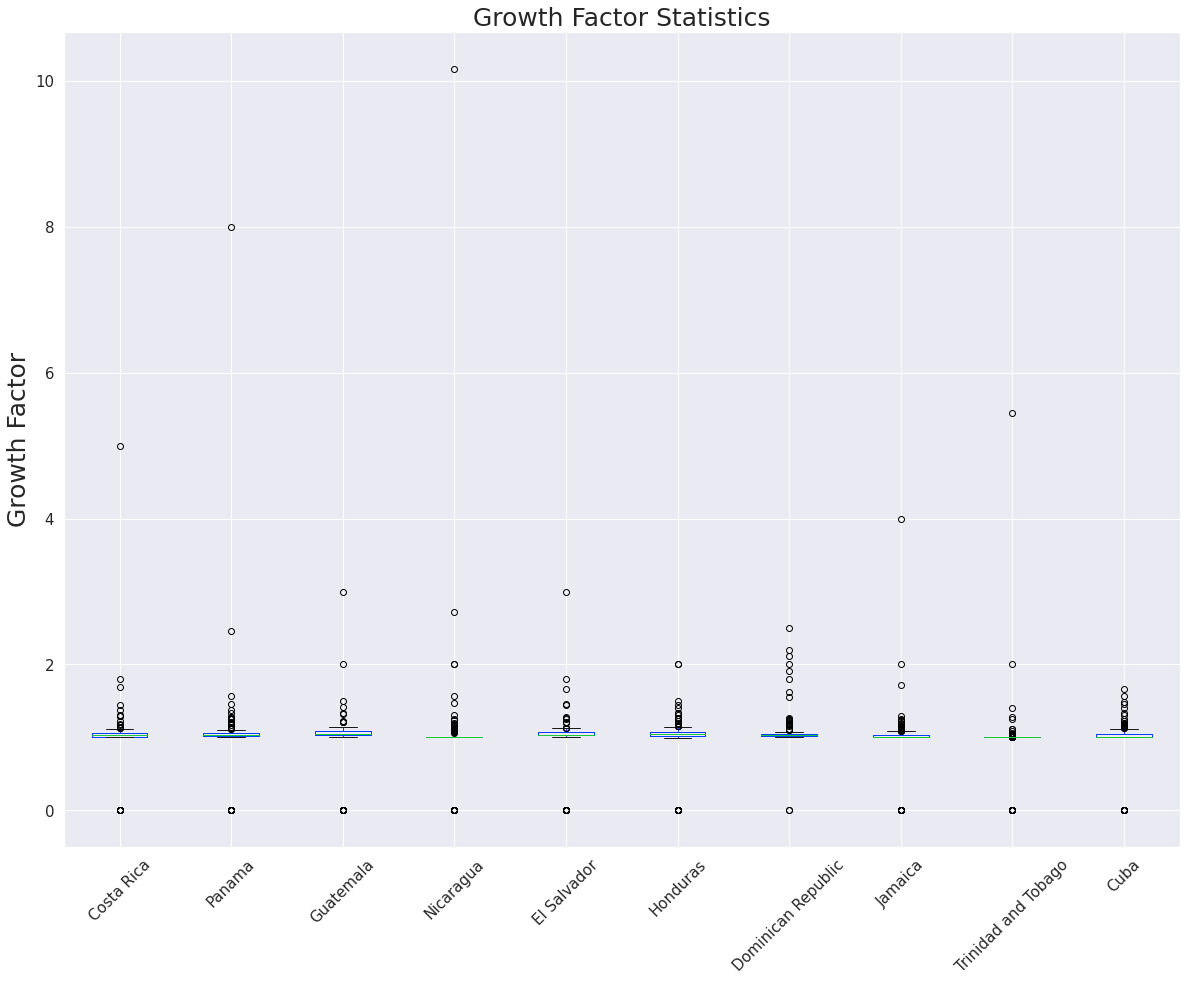

In [18]:
growth_df.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

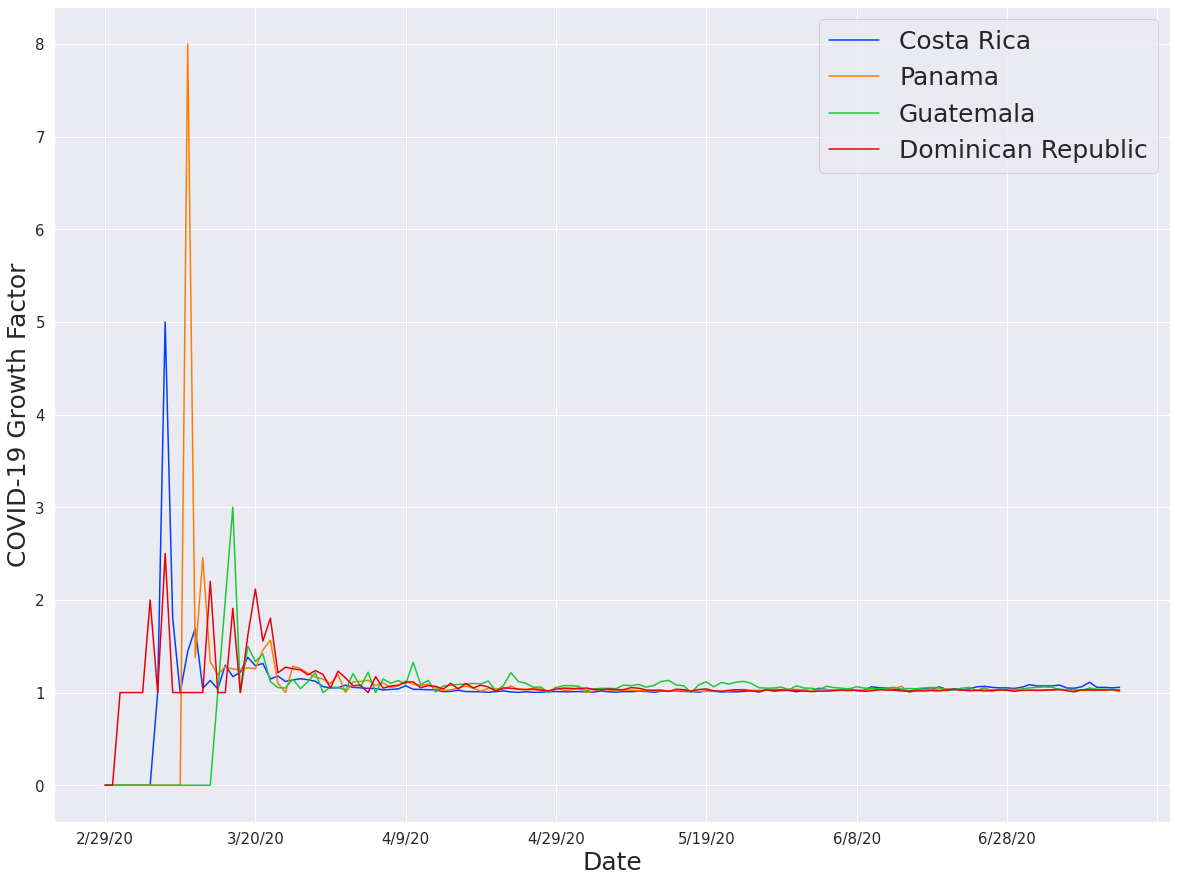

In [19]:
growth_df[['Costa Rica', 'Panama', 'Guatemala', 'Dominican Republic']].plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [20]:
growth_no_null = growth_df[growth_df > 0]
growth_no_null.describe()

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
count,129.000000,125.000000,121.000000,116.000000,116.000000,124.000000,134.000000,124.000000,121.000000,123.000000
mean,1.094545,1.135436,1.099920,1.142543,1.094300,1.087673,1.100109,1.072482,1.061226,1.061214
std,0.364261,0.638084,0.207060,0.872341,0.211192,0.147875,0.236116,0.291339,0.414993,0.116262
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.990476,1.000000,1.000000,1.000000,1.000000
25%,1.011723,1.023827,1.039462,1.000000,1.032087,1.025973,1.018890,1.002421,1.000000,1.003415
50%,1.031979,1.033295,1.055995,1.000000,1.043425,1.043376,1.028771,1.008223,1.000000,1.009626
75%,1.058122,1.070648,1.091954,1.000000,1.078590,1.077721,1.050395,1.058235,1.008772,1.065459
max,5.000000,8.000000,3.000000,10.160000,3.000000,2.000000,2.500000,4.000000,5.444444,1.666667


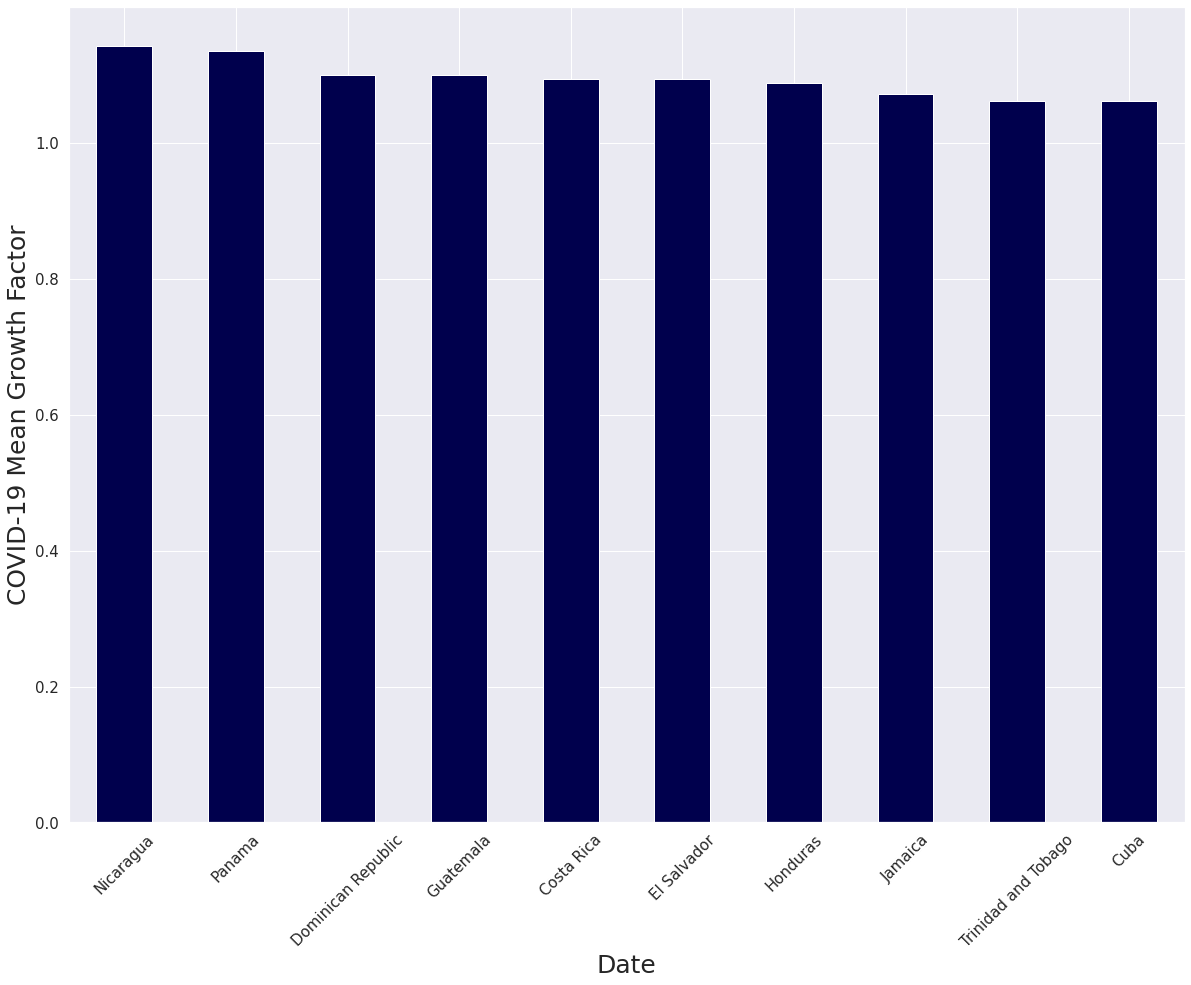

In [21]:
growth_no_null.mean().sort_values(ascending=False).plot(kind='bar', rot=45, cmap=plt.get_cmap('seismic'))
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Mean Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

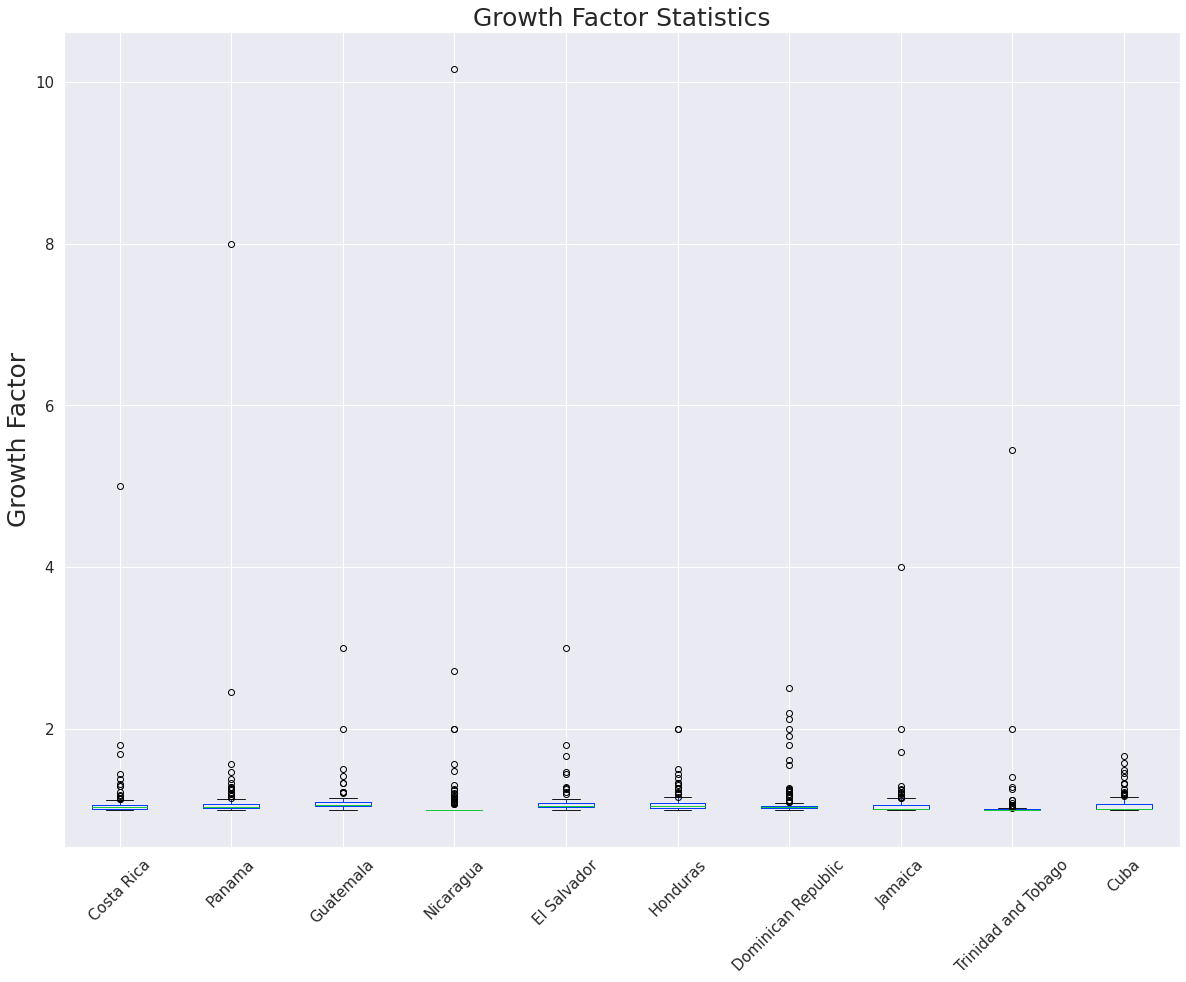

In [22]:
growth_no_null.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

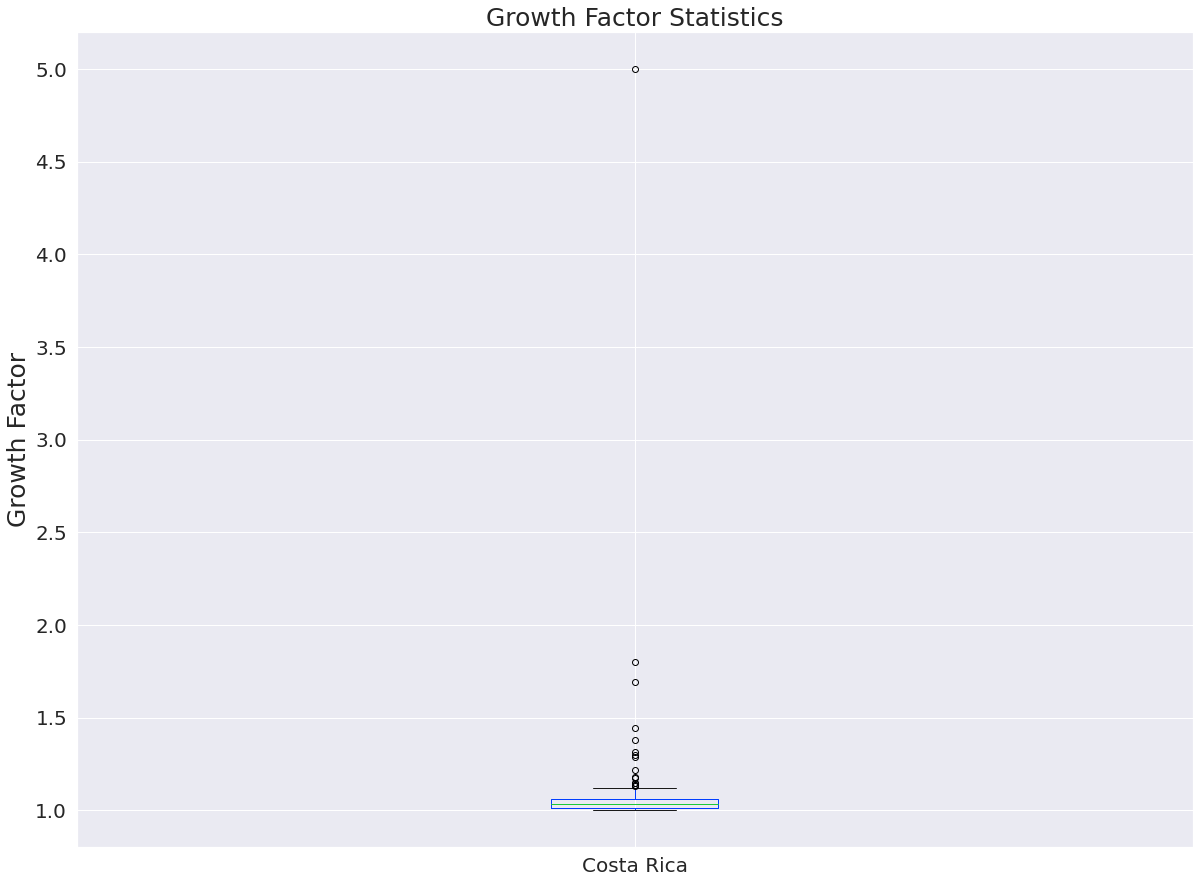

In [23]:
growth_no_null['Costa Rica'].plot(kind='box', fontsize=20)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()